In [105]:
# imports
import QuantLib as ql
import pandas as pd
import numpy as np

In [106]:
date = ql.Date(22, 3, 2024)
print(date)
print("%d-%d-%d" % (date.year(), date.month(), date.dayOfMonth()))
print(type(date))  # QuantLib.Date class

March 22nd, 2024
2024-3-22
<class 'QuantLib.QuantLib.Date'>


In [107]:
# Add 3 days
print("3 days after:", date + 3)

# Add 1 week
date_2 = date + ql.Period(1, ql.Weeks)
print("1 week after:", date_2)

# Add 2 months
date_3 = date + ql.Period(2, ql.Months)
print("2 months after:", date_3)

# Add 1 year
date_4 = print("1 year after:", date + ql.Period(1, ql.Years))

3 days after: March 25th, 2024
1 week after: March 29th, 2024
2 months after: May 22nd, 2024
1 year after: March 22nd, 2025


In [108]:
print(date.weekday())
print(date.weekday() == ql.Friday)

6
True


In [109]:
# Boolean operations in Date objects
print(date < ql.Date(25, 3, 2024))
print(date > ql.Date(20, 4, 2024))
print(date == ql.Date(22, 3, 2024))

True
False
True


In [110]:
date_1 = ql.Date(22, 3, 2024)
date_2 = ql.Date(25, 3, 2024)
date_2 - date_1  # 3 days

3

In [111]:
date_str = ql.Date("2024-03-22", "%Y-%m-%d")
print(date_str)
print(type(date_str))

March 22nd, 2024
<class 'QuantLib.QuantLib.Date'>


In [112]:
date = ql.Date(31, 3, 2015)

us_calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
print(us_calendar)
print(type(us_calendar))

turkey_calendar = ql.Turkey()
print(turkey_calendar)
print(type(turkey_calendar))

period = ql.Period(30, ql.Days)
raw_date = date + period
us_date = us_calendar.advance(date, period)  # advances the us business date by period business days
turkey_date = turkey_calendar.advance(date, period)  # advances the italy business date by period business days

print("Add 30 days: {0}".format(raw_date))
print("Add 30 business days in US: {0}".format(us_date))
print("Add 30 business days in Turkey: {0}".format(turkey_date))

# Notice Turkey and US business days & holidays differ, 10 days is not the same in Italy and US.

US government bond market calendar
<class 'QuantLib.QuantLib.UnitedStates'>
Turkey calendar
<class 'QuantLib.QuantLib.Turkey'>
Add 30 days: April 30th, 2015
Add 30 business days in US: May 12th, 2015
Add 30 business days in Turkey: May 14th, 2015


In [113]:
print(turkey_calendar.businessDaysBetween(date, turkey_date))
print(us_calendar.businessDaysBetween(date, us_date))

30
30


In [114]:
tenor = ql.Period(1, ql.Months)
print(tenor)

1M


The calendar object is
used for determining holidays

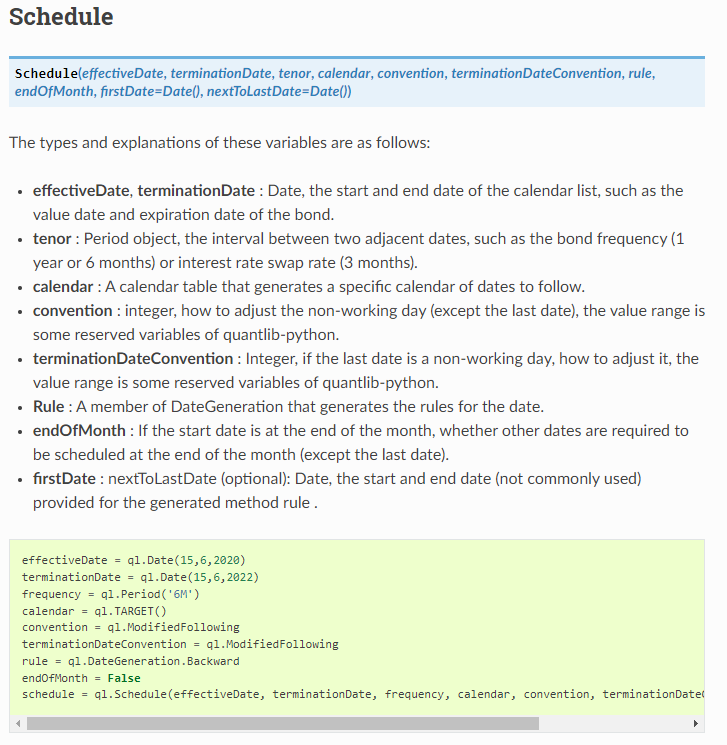

In [115]:
start = ql.Date(7,5,2020)
end = ql.Date(15,8,2020)

rules = {
    'Backward': ql.DateGeneration.Backward,
    'Forward': ql.DateGeneration.Forward,
    'Zero': ql.DateGeneration.Zero,
    'ThirdWednesDay': ql.DateGeneration.ThirdWednesday,
    'Twentieth': ql.DateGeneration.Twentieth,
    'TwentiethIMM': ql.DateGeneration.TwentiethIMM,
    'CDS': ql.DateGeneration.CDS

}

for name, rule in rules.items():
    schedule = ql.MakeSchedule(start, end, ql.Period('1m'), rule=rule)
    print(name, [dt for dt in schedule])

Backward [Date(7,5,2020), Date(15,5,2020), Date(15,6,2020), Date(15,7,2020), Date(15,8,2020)]
Forward [Date(7,5,2020), Date(7,6,2020), Date(7,7,2020), Date(7,8,2020), Date(15,8,2020)]
Zero [Date(7,5,2020), Date(15,8,2020)]
ThirdWednesDay [Date(7,5,2020), Date(17,6,2020), Date(15,7,2020), Date(15,8,2020)]
Twentieth [Date(7,5,2020), Date(20,5,2020), Date(20,6,2020), Date(20,7,2020), Date(20,8,2020)]
TwentiethIMM [Date(7,5,2020), Date(20,6,2020), Date(20,7,2020), Date(20,9,2020)]
CDS [Date(20,3,2020), Date(20,6,2020), Date(20,7,2020), Date(20,9,2020)]


In [116]:
effective_date = ql.Date(1, 1, 2015)
termination_date = ql.Date(1, 1, 2016)
tenor = ql.Period(ql.Monthly)  # Specifices the period length. (Here its 1 month.)
calendar = ql.UnitedStates(ql.UnitedStates.GovernmentBond)
business_convention = ql.Following
termination_business_convention = ql.Following
date_generation = ql.DateGeneration.Forward
end_of_month = False
schedule = ql.Schedule(effective_date, termination_date, tenor, calendar, business_convention, termination_business_convention, date_generation, end_of_month)


print(np.array(schedule))

pd.DataFrame({'date': list(schedule)})

[Date(2,1,2015) Date(2,2,2015) Date(2,3,2015) Date(1,4,2015)
 Date(1,5,2015) Date(1,6,2015) Date(1,7,2015) Date(3,8,2015)
 Date(1,9,2015) Date(1,10,2015) Date(2,11,2015) Date(1,12,2015)
 Date(4,1,2016)]


,date
0,"January 2nd, 2015"
1,"February 2nd, 2015"
2,"March 2nd, 2015"
3,"April 1st, 2015"
4,"May 1st, 2015"
5,"June 1st, 2015"
6,"July 1st, 2015"
7,"August 3rd, 2015"
8,"September 1st, 2015"
9,"October 1st, 2015"


Example:

ISIN: TRT020926T17

Issue Date: 08.09.2021

Maturity Date: 02.09.2026

Coupon frequency: 2

In [117]:
first_date = ql.Date("07.09.2022", "%d.%m.%Y")
print("first_date =", first_date)
last_date = ql.Date("02.09.2026", "%d.%m.%Y")
print("last_date =", last_date)

tr_calendar = ql.Turkey()

tenor = ql.Period(6, ql.Months)
print("tenor =", tenor)

# Other params
business_convention = ql.Preceding
termination_business_convention = ql.Following
date_generation = ql.DateGeneration.Forward
end_of_month = False

first_date = September 7th, 2022
last_date = September 2nd, 2026
tenor = 6M


In [119]:
tr_schedule = ql.Schedule(first_date, last_date, tenor, tr_calendar, business_convention, termination_business_convention, date_generation, end_of_month)

df = pd.DataFrame({"Coupon Dates":list(tr_schedule)})
df

,Coupon Dates
0,"September 7th, 2022"
1,"March 7th, 2023"
2,"September 7th, 2023"
3,"March 7th, 2024"
4,"September 6th, 2024"
5,"March 7th, 2025"
6,"September 5th, 2025"
7,"March 6th, 2026"
8,"September 2nd, 2026"
